# Task A


In [388]:
#numeric
import numpy as np
import pandas as pd
import xlrd
from pandas import DataFrame, read_csv
# graphics
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
#Disable warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

## Credit Card Data


### Build table




In [389]:
df = pd.read_excel('default_credit_card_clients.xls')
#dar nomes às colunas
df.columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 
              'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
              'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']

df = df.drop(['ID'])


### Rank features (Univariate Feature Selection)




In [390]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif, f_classif
import numpy

if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split
    
y=df.as_matrix(columns=[df.columns[23]])

# features

X=df.as_matrix(columns=df.columns[1:])
print(X.shape)

#feature extraction
#k=Number of top features to select
test = SelectKBest(f_classif, k=4)
fit = test.fit(X, y)

# print summarized scores
numpy.set_printoptions(precision=3)
print("Scores of each feature: ")
print(fit.scores_)

features = fit.transform(X)

# print the selected features (age,fnlwgt,capital-gain,capital-loss(?))
print("\nSelected features: ")
print(features)
#print(features[0:5,:])

(30000, 23)
Scores of each feature: 
[  4.798e+01   2.355e+01   1.778e+01   5.789e+00   3.538e+03   2.239e+03
   1.757e+03   1.477e+03   1.305e+03   1.085e+03   1.158e+01   6.044e+00
   5.944e+00   3.095e+00   1.371e+00   8.658e-01   1.604e+02   1.033e+02
   9.522e+01   9.719e+01   9.143e+01   8.509e+01         inf]

Selected features: 
[[2 2 -1 1]
 [-1 2 0 1]
 [0 0 0 0]
 ..., 
 [4 3 2 1]
 [1 -1 0 1]
 [0 0 0 1]]


/usr/local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw



### Perform dimension reduction (PCA)




In [391]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)
y_train=y_train.astype('int')
y_train= y_train.flatten()


In [392]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [393]:
from sklearn.decomposition import PCA 
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
pca.explained_variance_ratio_

array([ 0.282,  0.168,  0.071,  0.065,  0.045,  0.041,  0.04 ,  0.038,
        0.037,  0.037,  0.032,  0.031,  0.028,  0.024,  0.017,  0.011,
        0.011,  0.008,  0.006,  0.003,  0.002,  0.001,  0.001])

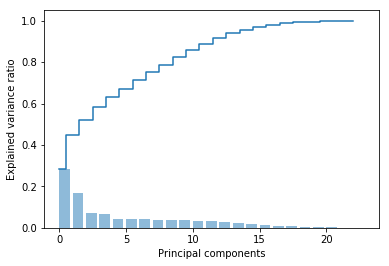

In [394]:
plt.bar(range(23), pca.explained_variance_ratio_, alpha=0.5, align='edge') 
plt.step(range(23), np.cumsum(pca.explained_variance_ratio_), where='mid') 
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show() 

In [395]:
# Only two components for illustration
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

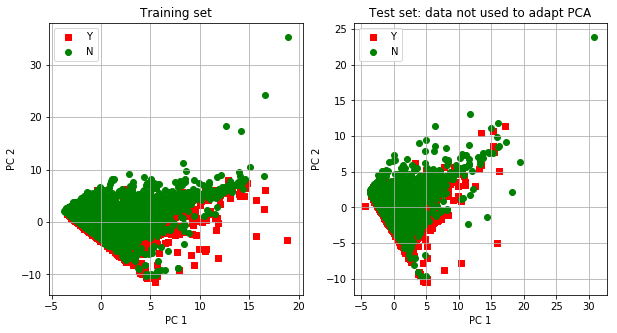

In [396]:
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes = axes.ravel()
ax = axes[0]
ax.figure
inx=(y_train==1)
inx=inx.ravel()
ax.scatter(X_train_pca[inx,0],X_train_pca[inx,1],marker='s',color='r',label='Y')

inx=(y_train==0)
inx=inx.ravel() 
ax.scatter(X_train_pca[inx,0],X_train_pca[inx,1],marker='o',color='g',label='N') 
ax.set_title("Training set")
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.legend()
ax.grid()


ax = axes[1]
ax.figure
inx=(y_test==1)
inx=inx.ravel() 
ax.scatter(X_test_pca[inx,0],X_test_pca[inx,1],marker='s',color='r',label='Y') 
inx=(y_test==0)
inx=inx.ravel() 
ax.scatter(X_test_pca[inx,0],X_test_pca[inx,1],marker='o',color='g',label='N')

ax.set_title("Test set: data not used to adapt PCA")

ax.legend()
ax.grid()
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

# Task B

In [422]:
#numeric
import numpy as np
import pandas as pd
# graphics
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#
#Added version check for recent scikit-learn 0.18 checks from distutils.version import LooseVersion as Version from sklearn import __version__ as sklearn_version ###########
from numpy import linalg as LA

from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02): 
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) 
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap) 
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
            alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)
        

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(10,5),alpha=0.01, max_iter=5000)
mlp

from sklearn.svm import SVC
svm=SVC(C=1.0,kernel='rbf', max_iter=1000, tol=1e-05, verbose=0)
svm

#from sklearn.tree import DecisionTreeClassifier  
#classifier = DecisionTreeClassifier()  

 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=1000, probability=False, random_state=None,
  shrinking=True, tol=1e-05, verbose=0)

In [ ]:
print(X_train_pca)
print(y_train)
mlp.fit(X_train_pca,y_train)
svm.fit(X_train_pca,y_train)
#classifier.fit(X_train_pca, y_train)  

In [ ]:
print(X_train_pca)
print(y_train)

#plot_decision_regions(X_train_pca, y_train, classifier=mlp) 
plot_decision_regions(X_train_pca, y_train, classifier=svm) 
#plot_decision_regions(X_train_pca, y_train, classifier=classifier) 
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()


In [421]:
print('the weights are \n',mlp.coefs_) 
print('the bias \n ', mlp.intercepts_) 
print('number of iterations \n', mlp.n_iter_) 
print('output activation', mlp.out_activation_)

the weights are 
 [array([[-0.425, -1.331,  0.76 , -0.257, -0.868,  0.309, -0.529, -0.653,
        -0.842, -0.298],
       [ 1.067,  1.204,  0.394,  0.294,  1.523, -0.671, -0.53 , -0.65 ,
         1.509,  0.137]]), array([[-0.154, -0.086,  1.35 , -0.414,  0.887],
       [ 0.524, -0.651,  1.057, -0.546,  0.864],
       [-5.032,  0.362,  0.062, -0.056, -0.55 ],
       [-0.471,  0.883,  1.082,  0.453,  1.276],
       [ 0.145, -0.695,  2.175,  0.076,  2.52 ],
       [-0.03 , -0.493, -1.331, -0.271, -1.785],
       [ 2.32 ,  0.536, -0.137,  0.317,  0.264],
       [ 2.106, -0.439, -0.711,  0.504,  0.133],
       [-0.045, -0.382,  2.196,  0.454,  2.731],
       [ 1.08 ,  0.718, -0.065, -0.373, -0.791]]), array([[ 3.001],
       [-2.49 ],
       [-1.151],
       [ 0.042],
       [-1.654]])]
the bias 
  [array([ 0.229, -0.17 ,  1.678,  0.325,  1.103, -0.404, -1.035, -1.076,
        1.   , -1.202]), array([-0.584,  0.015, -0.081,  0.678,  0.755]), array([ 1.308])]
number of iterations 
 144
outp

## Adult Dataset

In [197]:
#numeric
import numpy as np
import pandas as pd
import xlrd
from pandas import DataFrame, read_csv
# graphics
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
#Disable warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version


### Build table




In [198]:
#df = data
data = pd.read_csv('adult.data.txt', delimiter=", ", header=None, engine='python')
#dar nomes às colunas
data.columns = ["age", "workclass", "fnlwgt", "education", "education-num", \
                "marital-status" ,"occupation", "relationship", "race", "sex" ,\
                "capital-gain", "capital-loss", "hours-per-week", "native-country", \
                "probability-label"]

#show all features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                  32561 non-null int64
workclass            32561 non-null object
fnlwgt               32561 non-null int64
education            32561 non-null object
education-num        32561 non-null int64
marital-status       32561 non-null object
occupation           32561 non-null object
relationship         32561 non-null object
race                 32561 non-null object
sex                  32561 non-null object
capital-gain         32561 non-null int64
capital-loss         32561 non-null int64
hours-per-week       32561 non-null int64
native-country       32561 non-null object
probability-label    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Mapping categorical data into numeric data


In [199]:
workclass_map = {'Private': 1,'Self-emp-not-inc': 2,'Self-emp-inc': 3,'Federal-gov': 4,'Local-gov': 5,
                               'State-gov': 6,'Without-pay': 7,'Never-worked': 8}

education_map = {'Bachelors': 1,'Some-college': 2,'11th': 3,'HS-grad': 4,'Prof-school': 5,
                                 'Assoc-acdm': 6,'Assoc-voc': 7,'9th': 8,'7th-8th': 9,'12th': 10,'Masters': 11,
                                 '1st-4th': 12,'10th': 13,'Doctorate': 14,'5th-6th': 15,'Preschool': 16}

marital_map = {'Married-civ-spouse': 1,'Divorced': 2,'Never-married': 3,'Separated': 4,
                                   'Widowed': 5,'Married-spouse-absent': 6,'Married-AF-spouse': 7}

occupation_map = {'Tech-support': 1,'Craft-repair': 2,'Other-service': 3,'Sales': 4,
                                'Exec-managerial': 5,'Prof-specialty': 6,'Handlers-cleaners': 7,
                                'Machine-op-inspct': 8,'Adm-clerical': 9,'Farming-fishing': 10,
                                'Transport-moving': 11,'Priv-house-serv': 12,'Protective-serv': 13,
                                'Armed-Forces': 14}

relationship_map = {'Wife': 1,'Own-child': 2,'Husband': 3,'Not-in-family': 4,
                                      'Other-relative': 5,'Unmarried': 6}

race_map = {'White': 1,'Asian-Pac-Islander': 2,'Amer-Indian-Eskimo': 3,'Other': 4,'Black': 5}

sex_map = {'Female': 1,'Male': 2}

country_map = {'United-States': 1,'Cambodia': 2,'England': 3,'Puerto-Rico': 4,
                                   'Canada': 5,'Germany': 6,'Outlying-US(Guam-USVI-etc)': 7,'India': 8,
                                   'Japan': 9,'Greece': 10,'South': 11,'China': 12,'Cuba': 13,'Iran': 14,
                                   'Honduras': 15,'Philippines': 16,'Italy': 17,'Poland': 18,'Jamaica': 19,
                                   'Vietnam': 20,'Mexico': 21,'Portugal': 22,'Ireland': 23,'France': 24,
                                   'Dominican-Republic': 25,'Laos': 26,'Ecuador': 27,'Taiwan': 28,'Haiti': 29,
                                   'Columbia': 30,'Hungary': 31,'Guatemala': 32,'Nicaragua': 33,'Scotland': 34,
                                   'Thailand': 35,'Yugoslavia': 36,'El-Salvador': 37,'Trinadad&Tobago': 38,
                                   'Peru': 39,'Hong': 40,'Holand-Netherlands': 41}

probability_map = {'<=50K': 1, '>50K' : 2}

data['workclass'] = data['workclass'].map(workclass_map)
data['education'] = data['education'].map(education_map)
data['marital-status'] = data['marital-status'].map(marital_map)
data['occupation'] = data['occupation'].map(occupation_map)
data['relationship'] = data['relationship'].map(relationship_map)
data['race'] = data['race'].map(race_map)
data['sex'] = data['sex'].map(sex_map)
data['native-country'] = data['native-country'].map(country_map)
data['probability-label'] = data['probability-label'].map(probability_map)

In [200]:
#Drop rows with NaN
#data.dropna(thresh=16)

data = data.dropna(how="any")

#data = data[data.age != '?']

### Rank features (Univariate Feature Selection)

In [201]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif
import numpy

array = data.values

X2 = array[:,0:15]
Y2 = array[:,14]

#print(X2)
#print("\n")
#print(Y2)
#feature extraction
#k=Number of top features to select
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X2, Y2)

# print summarized scores
numpy.set_printoptions(precision=3)
print("Scores of each feature: ")
print(fit.scores_)

features = fit.transform(X2)

# print the selected features (age,fnlwgt,capital-gain,capital-loss(?))
print("\nSelected features: ")
print(features)
#print(features[0:5,:])


Scores of each feature: 
[  7.928e+03   2.723e+02   1.423e+05   7.424e+00   2.178e+03   2.888e+03
   9.492e+01   4.313e+02   2.759e+02   1.852e+02   7.413e+07   1.256e+06
   5.569e+03   1.349e+03   4.515e+03]

Selected features: 
[[  3.900e+01   7.752e+04   2.174e+03   0.000e+00]
 [  5.000e+01   8.331e+04   0.000e+00   0.000e+00]
 [  3.800e+01   2.156e+05   0.000e+00   0.000e+00]
 ..., 
 [  5.800e+01   1.519e+05   0.000e+00   0.000e+00]
 [  2.200e+01   2.015e+05   0.000e+00   0.000e+00]
 [  5.200e+01   2.879e+05   1.502e+04   0.000e+00]]


### Perform dimension reduction (PCA)

In [202]:
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

#### Prepare data for classification task

In [383]:
print(X2.shape)

X_train, X_test, y_train, y_test = \
    train_test_split(X2, Y2, test_size=0.3, random_state=0)
print(y_train)

(30162, 15)
[ 1.  1.  1. ...,  1.  2.  1.]


#### Standardize the data

In [204]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

#### Applying PCA

In [205]:
pca = PCA()
principalComponents = pca.fit_transform(X_train_std)
principalComponentsTest = pca.transform(X_test_std)

pca.explained_variance_ratio_

#print(principalComponents) #316695
#create new 
#data_new = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2'])

#data_new = pd.concat([data_new, data[['probability-label']]], axis = 1)

#plt.bar(range(14), pca.explained_variance_ratio_, alpha=0.5, align='center')
#plt.step(range(14), np.cumsum(pca.explained_variance_ratio_), where='mid')
#plt.ylabel('Explained variance ratio')
#plt.xlabel('Principal components')
#plt.show()

array([ 0.154,  0.095,  0.09 ,  0.074,  0.073,  0.068,  0.067,  0.061,
        0.058,  0.056,  0.053,  0.047,  0.041,  0.033,  0.03 ])

#### Computing plots

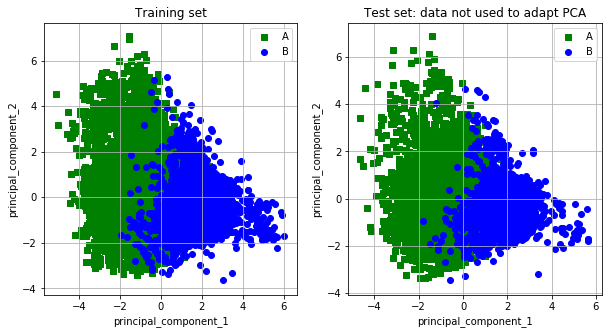

In [206]:
#label A = above 50K
#label B = below 50K
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axes = axes.ravel()  

ax = axes[0]
ax.figure
inx=(y_train==1)
inx=inx.ravel()
ax.scatter(principalComponents[inx,0],principalComponents[inx,1],marker='s',color='g',label='A')
inx=(y_train==2)
inx=inx.ravel()
ax.scatter(principalComponents[inx,0],principalComponents[inx,1],marker='o',color='b',label='B')    
ax.set_title("Training set")
ax.set_xlabel('principal_component_1')
ax.set_ylabel('principal_component_2')
ax.legend()
ax.grid()
#plt.show()
 
ax = axes[1]
ax.figure
inx=(y_test==1)
inx=inx.ravel()
ax.scatter(principalComponentsTest[inx,0],principalComponentsTest[inx,1],marker='s',color='g',label='A')  
inx=(y_test==2)
inx=inx.ravel()
ax.scatter(principalComponentsTest[inx,0],principalComponentsTest[inx,1],marker='o',color='b',label='B')
ax.set_title("Test set: data not used to adapt PCA")    
ax.legend() 
ax.grid()
plt.xlabel('principal_component_1')
plt.ylabel('principal_component_2')
plt.show()